<a href="https://colab.research.google.com/github/Rajashree-Ramaprabu/Bolstering-Business-Performance-for-Cafe-Data-Driven-Marketing-Strategies-SPSS/blob/main/Capstone_OLS_one_to_one_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import statsmodels.api as sm

file_path = '/content/movies_metadata.csv'
df = pd.read_csv(file_path)

<ipython-input-1-8644412f672f>:5: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [ ]:
print(df.describe())

            revenue       runtime  vote_average    vote_count
count  4.546000e+04  45203.000000  45460.000000  45460.000000
mean   1.120935e+07     94.128199      5.618207    109.897338
std    6.433225e+07     38.407810      1.924216    491.310374
min    0.000000e+00      0.000000      0.000000      0.000000
25%    0.000000e+00     85.000000      5.000000      3.000000
50%    0.000000e+00     95.000000      6.000000     10.000000
75%    0.000000e+00    107.000000      6.800000     34.000000
max    2.787965e+09   1256.000000     10.000000  14075.000000


In [ ]:
print(df.isnull().sum())

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64


In [ ]:
print(df.head())

   adult                              belongs_to_collection    budget  \
0  False  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000   
1  False                                                NaN  65000000   
2  False  {'id': 119050, 'name': 'Grumpy Old Men Collect...         0   
3  False                                                NaN  16000000   
4  False  {'id': 96871, 'name': 'Father of the Bride Col...         0   

                                              genres  \
0  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
1  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   
2  [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...   
3  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
4                     [{'id': 35, 'name': 'Comedy'}]   

                               homepage     id    imdb_id original_language  \
0  http://toystory.disney.com/toy-story    862  tt0114709                en   
1                                   NaN   8844  tt0113497         

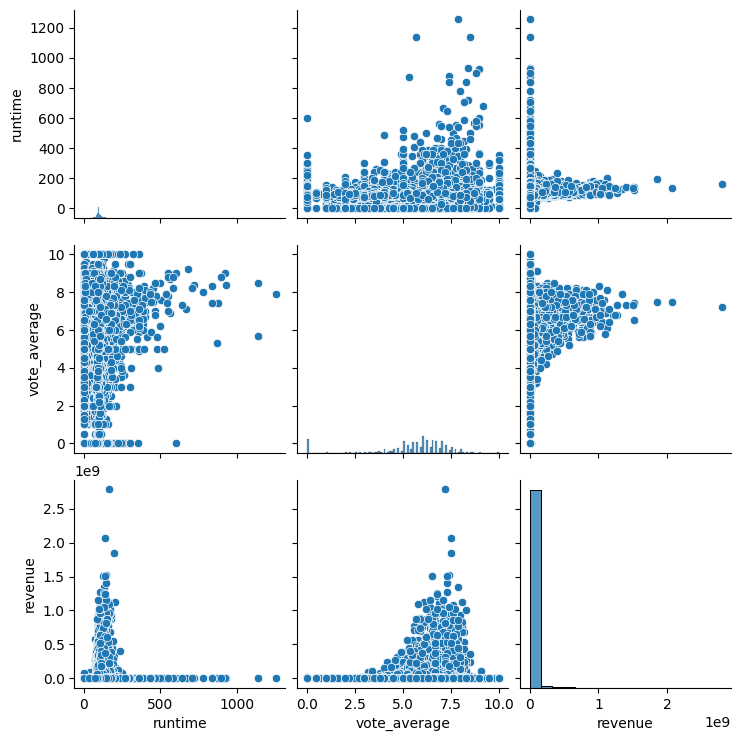

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

selected_columns = ['budget', 'popularity', 'runtime', 'vote_average', 'revenue']

sns.pairplot(df[selected_columns])
plt.show()

In [ ]:
df['budget'] = pd.to_numeric(df['budget'], errors='coerce')
df['revenue'] = pd.to_numeric(df['revenue'], errors='coerce')
df['runtime'] = pd.to_numeric(df['runtime'], errors='coerce')
df['vote_average'] = pd.to_numeric(df['vote_average'], errors='coerce')
df['vote_count'] = pd.to_numeric(df['vote_count'], errors='coerce')

In [ ]:
df['budget'].fillna(df['budget'].median(), inplace=True)
df['revenue'].fillna(df['revenue'].median(), inplace=True)
df['runtime'].fillna(df['runtime'].median(), inplace=True)
df['vote_average'].fillna(df['vote_average'].median(), inplace=True)
df['vote_count'].fillna(df['vote_count'].median(), inplace=True)

In [ ]:
df['language_code'] = df['original_language'].astype('category').cat.codes
df['status_code'] = df['status'].astype('category').cat.codes


In [ ]:
import pandas as pd
import json
import statsmodels.formula.api as smf


# 1. Remove unrelated columns
columns_to_keep = [
    'budget', 'genres', 'original_language', 'popularity', 'runtime',
    'release_date', 'revenue', 'vote_average', 'vote_count',
    'production_companies', 'production_countries', 'spoken_languages', 'status'
]
df = df[columns_to_keep]

# 2. Handle missing values
df = df.dropna(subset=columns_to_keep)

# 3. Process text columns
def extract_names(json_str):
    try:
        items = json.loads(json_str)
        return ','.join([item['name'] for item in items])
    except:
        return ''

df['genres'] = df['genres'].apply(extract_names)
df['production_companies'] = df['production_companies'].apply(extract_names)
df['production_countries'] = df['production_countries'].apply(extract_names)
df['spoken_languages'] = df['spoken_languages'].apply(extract_names)

# Encoding categorical columns with pd.Categorical
df['original_language'] = pd.Categorical(df['original_language'])
df['status'] = pd.Categorical(df['status'])
df['genres'] = pd.Categorical(df['genres'])
df['production_companies'] = pd.Categorical(df['production_companies'])
df['production_countries'] = pd.Categorical(df['production_countries'])
df['spoken_languages'] = pd.Categorical(df['spoken_languages'])

# Converting release_date to datetime and extracting year
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df['release_year'] = df['release_date'].dt.year
df = df.drop(columns=['release_date'])

# Ensure data types are correct
df['budget'] = df['budget'].astype(float)
df['popularity'] = df['popularity'].astype(float)
df['runtime'] = df['runtime'].astype(float)
df['revenue'] = df['revenue'].astype(float)
df['vote_average'] = df['vote_average'].astype(float)
df['vote_count'] = df['vote_count'].astype(float)

In [ ]:
df.loc[:,"budget"]

0        30000000.0
1        65000000.0
2               0.0
3        16000000.0
4               0.0
            ...    
45460           0.0
45462           0.0
45463           0.0
45464           0.0
45465           0.0
Name: budget, Length: 45285, dtype: float64

In [ ]:
df.loc[:,"revenue"]

0        373554033.0
1        262797249.0
2                0.0
3         81452156.0
4         76578911.0
            ...     
45460            0.0
45462            0.0
45463            0.0
45464            0.0
45465            0.0
Name: revenue, Length: 45285, dtype: float64

In [ ]:
df['profit_margin'] = (df['revenue'] - df['budget']) / df['revenue']

print(df.head())

     budget genres original_language  popularity  runtime   revenue  \
0  1.475637                       en   21.946943     81.0  5.621264   
1  3.480660                       en   17.015539    104.0  3.902824   
2 -0.242954                       en   11.712900    101.0 -0.174590   
3  0.673628                       en    3.859495    127.0  1.089176   
4 -0.242954                       en    8.387519    106.0  1.013565   

   vote_average  vote_count production_companies production_countries  \
0           7.7      5415.0                                             
1           6.9      2413.0                                             
2           6.5        92.0                                             
3           6.1        34.0                                             
4           5.7       173.0                                             

  spoken_languages    status  release_year  profit_margin  language_code  \
0                   Released          1995       0.737490 

In [ ]:
df.loc[:,"profit_margin"]

0        0.919690
1        0.752661
2             NaN
3        0.803566
4        1.000000
           ...   
45460         NaN
45462         NaN
45463         NaN
45464         NaN
45465         NaN
Name: profit_margin, Length: 45285, dtype: float64

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['budget', 'revenue']] = scaler.fit_transform(df[['budget', 'revenue']])

In [ ]:
categorical_columns = ['genres', 'original_language', 'production_companies',
                       'production_countries', 'spoken_languages', 'status']

# Calculate value counts for each categorical column
for col in categorical_columns:
    unique = len(df[col].unique())
    print(f"unique counts for {col}:\n{unique}\n")

unique counts for genres:
1

unique counts for original_language:
89

unique counts for production_companies:
1

unique counts for production_countries:
1

unique counts for spoken_languages:
1

unique counts for status:
6



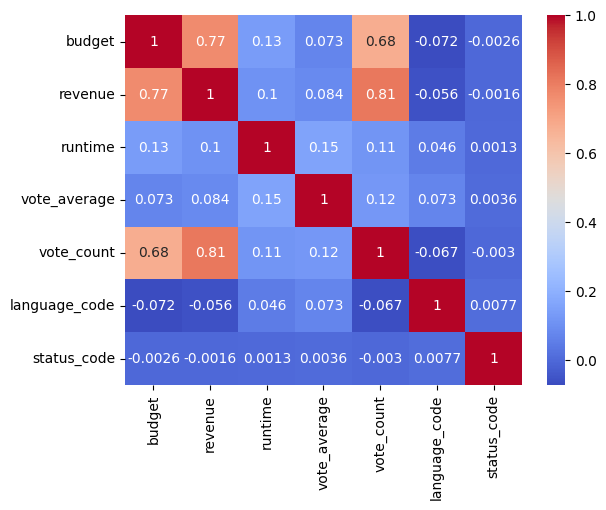

In [ ]:
correlation_matrix = df[['budget', 'revenue', 'runtime', 'vote_average', 'vote_count', 'language_code', 'status_code']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


In [ ]:
feature_combinations = [
    ['budget', 'runtime', 'vote_average', 'vote_count'],
    ['budget', 'vote_average', 'vote_count'],
    ['budget', 'runtime', 'vote_count'],
    ['budget', 'runtime', 'vote_average'],
    ['budget', 'runtime', 'vote_average', 'vote_count', 'language_code', 'status_code']
]


for features in feature_combinations:
    X = df[features]
    y = df['revenue']

    X = sm.add_constant(X)

    model = sm.OLS(y, X).fit()

    print(f"Model with features: {features}")
    print(model.summary())
    print("\n" + "="*80 + "\n")

Model with features: ['budget', 'runtime', 'vote_average', 'vote_count']
                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                 3.366e+04
Date:                Mon, 08 Jul 2024   Prob (F-statistic):               0.00
Time:                        00:21:47   Log-Likelihood:                -33017.
No. Observations:               45285   AIC:                         6.604e+04
Df Residuals:                   45280   BIC:                         6.609e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------

**Revenue with Independent Features**

In [ ]:
individual_features = ['budget', 'runtime', 'vote_average', 'vote_count', 'language_code', 'status_code', 'release_year']

for feature in individual_features:
    X = df[[feature]]
    y = df['revenue']

    X = sm.add_constant(X)

    model = sm.OLS(y, X).fit()

    print(f"Model with feature: {feature}")
    print(model.summary())
    print("\n" + "="*80 + "\n")

Model with feature: budget
                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.591
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                 6.543e+04
Date:                Mon, 08 Jul 2024   Prob (F-statistic):               0.00
Time:                        02:09:47   Log-Likelihood:                -44015.
No. Observations:               45285   AIC:                         8.803e+04
Df Residuals:                   45283   BIC:                         8.805e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.101e-15    

**Popularity with Independent Features**

In [ ]:
individual_features = ['budget', 'revenue', 'runtime', 'vote_average', 'vote_count', 'language_code', 'status_code', 'release_year']


for feature in individual_features:
    X = df[[feature]]
    y = df['popularity']

    X = sm.add_constant(X)

    model = sm.OLS(y, X).fit()

    print(f"Model with feature: {feature}")
    print(model.summary())
    print("\n" + "="*80 + "\n")

Model with feature: budget
                            OLS Regression Results                            
Dep. Variable:             popularity   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.202
Method:                 Least Squares   F-statistic:                 1.146e+04
Date:                Mon, 08 Jul 2024   Prob (F-statistic):               0.00
Time:                        02:10:20   Log-Likelihood:            -1.4040e+05
No. Observations:               45285   AIC:                         2.808e+05
Df Residuals:                   45283   BIC:                         2.808e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9319    

**Profit Margin with Independent Features**

In [ ]:
individual_features = ['budget', 'runtime', 'vote_average', 'vote_count', 'language_code', 'status_code', 'release_year']

for feature in individual_features:
    X = df[[feature]]
    y = df['profit_margin']

    X = sm.add_constant(X)

    model = sm.OLS(y, X).fit()

    print(f"Model with feature: {feature}")
    print(model.summary())
    print("\n" + "="*80 + "\n")

Model with feature: budget
                            OLS Regression Results                            
Dep. Variable:          profit_margin   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     8.953
Date:                Mon, 08 Jul 2024   Prob (F-statistic):            0.00277
Time:                        01:53:08   Log-Likelihood:            -2.7442e+05
No. Observations:               45285   AIC:                         5.488e+05
Df Residuals:                   45283   BIC:                         5.489e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6157    